c:\Users\purav\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Temperature shape: (366, 31, 31)
Latitude shape: (31,)
Longitude shape: (31,)
Interpolation successful!


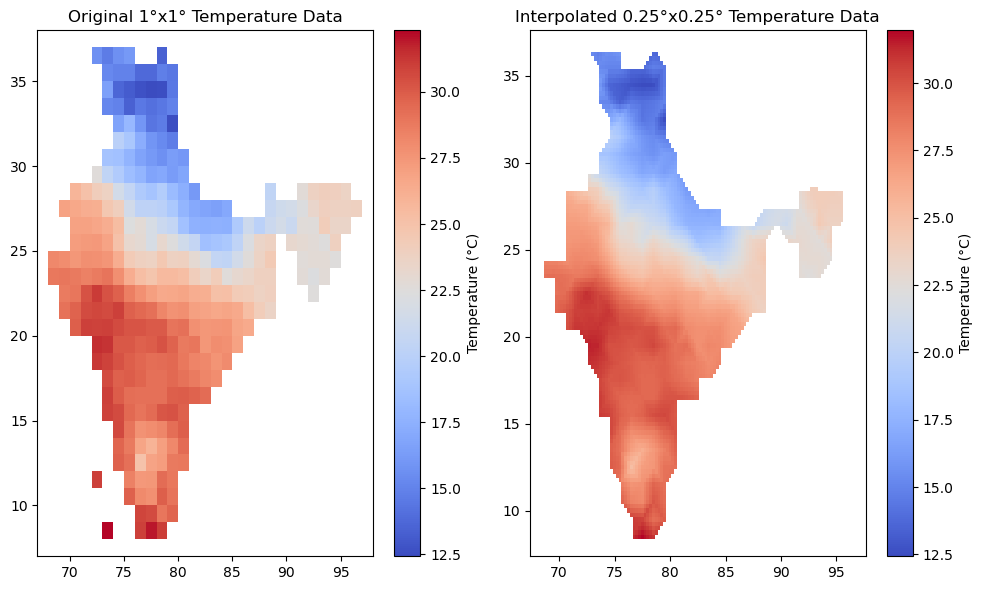

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

nc_file = r"C:\Users\purav\OneDrive\Desktop\Fi Year Project\Final-Year-Project\Data\Temperature\Maxtemp_MaxT_2000.nc" 
ds = xr.open_dataset(nc_file)

# Extract variables
temp = ds['temperature'].values  
lat = ds['lat'].values
lon = ds['lon'].values
ds.close()

print(f"Temperature shape: {temp.shape}")  
print(f"Latitude shape: {lat.shape}")  
print(f"Longitude shape: {lon.shape}")  


temp_2d = temp[0, :, :]  


if lat.shape[0] * lon.shape[0] != temp_2d.size:
    print("Mismatch in the number of points and values!")
    print(f"Expected points: {lat.shape[0] * lon.shape[0]}, but got {temp_2d.size}")

target_lats = np.arange(lat.min(), lat.max() + 0.25, 0.25)
target_lons = np.arange(lon.min(), lon.max() + 0.25, 0.25)

lon_grid, lat_grid = np.meshgrid(lon, lat)

# Target grid
target_lon_grid, target_lat_grid = np.meshgrid(target_lons, target_lats)

# Try interpolation
try:
    interpolated_temp = griddata(
        (lon_grid.flatten(), lat_grid.flatten()),  # Original points
        temp_2d.flatten(),  # Original values
        (target_lon_grid, target_lat_grid),  # Target grid
        method='linear'
    )
    print("Interpolation successful!")
except ValueError as e:
    print("Interpolation error:", e)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(lon, lat, temp_2d, shading='auto', cmap='coolwarm')
plt.colorbar(label="Temperature (°C)")
plt.title("Original 1°x1° Temperature Data")

plt.subplot(1, 2, 2)
plt.pcolormesh(target_lons, target_lats, interpolated_temp, shading='auto', cmap='coolwarm')
plt.colorbar(label="Temperature (°C)")
plt.title("Interpolated 0.25°x0.25° Temperature Data")

plt.tight_layout()
plt.show()
